In [1]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('data/titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
a = dataset['Age'].notnull()  #tworzy nam series z wartościami true dla tych Age, które nie są null
#type(a)

In [36]:
age_values = dataset.loc[dataset['Age'].notnull(), 'Age'].values
#age_values
print(age_values.shape)


(714,)


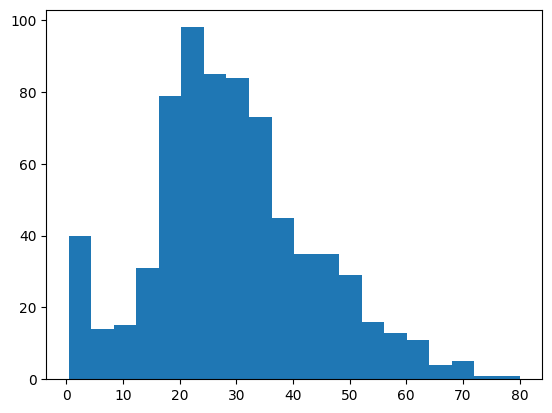

In [4]:
plt.hist(age_values, bins=20)
plt.show()

In [5]:
mean_age = np.round(np.mean(age_values))
print(mean_age)

30.0


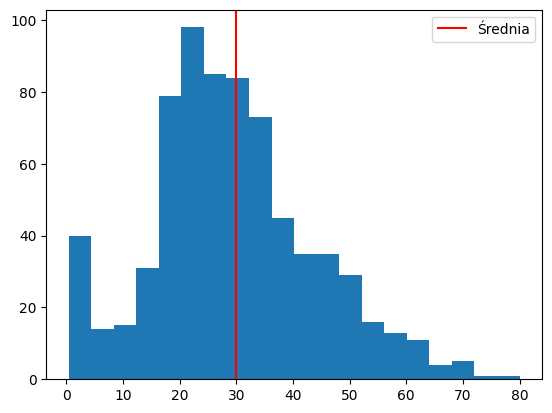

In [6]:
plt.hist(age_values, bins=20)
plt.axvline(x = mean_age, color='red', label = 'Średnia')
plt.legend(loc='upper right')
plt.show()

In [37]:
median_age = np.median(age_values)
print(median_age)

28.0


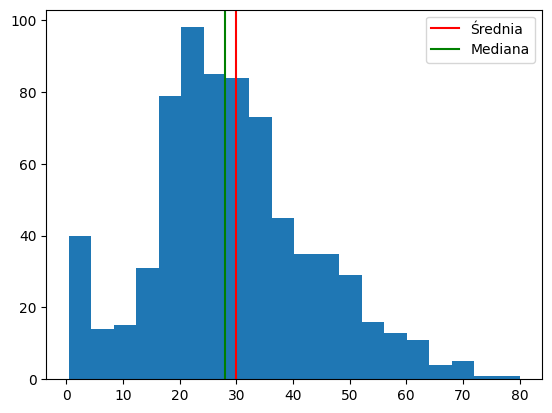

In [8]:
plt.hist(age_values, bins=20)
plt.axvline(x = mean_age, color='red', label = 'Średnia')
plt.axvline(x = median_age, color='green', label = 'Mediana')
plt.legend(loc='upper right')
plt.show()

In [9]:
mode_age = stats.mode(age_values)
print(mode_age)

ModeResult(mode=array([24.]), count=array([30]))


C:\Users\poczt\AppData\Local\Temp\ipykernel_16896\3892091830.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_age = stats.mode(age_values)


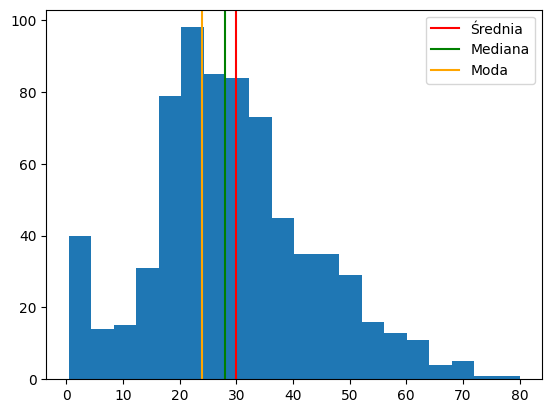

In [10]:
plt.hist(age_values, bins=20)
plt.axvline(x = mean_age, color='red', label = 'Średnia')
plt.axvline(x = median_age, color='green', label = 'Mediana')
plt.axvline(x = mode_age[0], color='orange', label = 'Moda')
plt.legend(loc='upper right')
plt.show()

In [11]:
#KWARTYLE

In [12]:
q0 = np.quantile(age_values, 0.0)
q1 = np.round(np.quantile(age_values, 0.25))
q3 = np.round(np.quantile(age_values, 0.75))
q4 = np.round(np.quantile(age_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_age}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.42
Q1: 20.0
Q2: 28.0
Q3: 38.0
Q4: 80.0


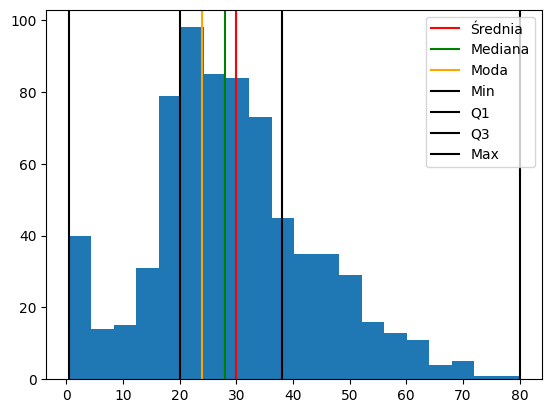

In [13]:
plt.hist(age_values, bins=20)
plt.axvline(x = mean_age, color='red', label = 'Średnia')
plt.axvline(x = median_age, color='green', label = 'Mediana')
plt.axvline(x = mode_age[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

In [14]:
#Zakres

In [15]:
range_age = max(age_values) - min(age_values)
print(range_age)

79.58


In [16]:
#Rozstęp międzykwartylowy - IQR

In [17]:
iqr = q3 - q1
print(iqr)

18.0


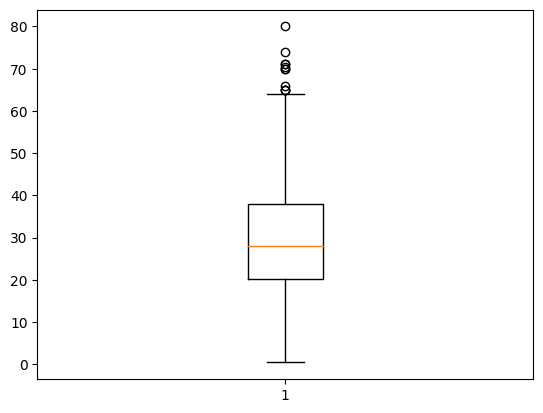

In [18]:
plt.boxplot(age_values)
plt.show()

In [19]:
#Wariancja

In [20]:
variance_age = np.var(age_values, ddof=1)
print(variance_age)

211.01912474630805


In [21]:
#Odchylenie standardowe

In [22]:
print(variance_age**(1/2))

14.526497332334042


In [23]:
standard_deviation_age = np.std(age_values, ddof=1)
print(standard_deviation_age)

14.526497332334042


In [24]:
#Asyetria rozkładu

In [25]:
#Skalowanie zmiennej

In [26]:
#Standaryzacja to technika skalowania, w której wartości są wyśrodkowane wobec średniej i wyskalowane wobec średniej.

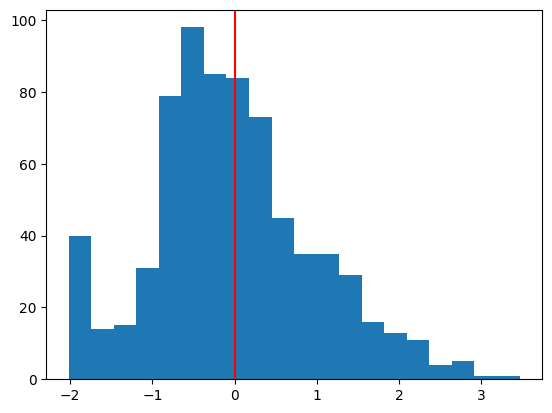

Średnia: 2.338621049070358e-16
Odchylenie standardowe: 1.000701016559981


In [27]:
scaler_standardized = StandardScaler()
standardized_age_values = scaler_standardized.fit_transform(age_values.reshape(-1, 1))
plt.hist(standardized_age_values, bins=20)
plt.axvline(x = standardized_age_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {standardized_age_values.mean()}')
print(f'Odchylenie standardowe: {np.std(standardized_age_values, ddof=1)}')

In [28]:
#Min Max Scaler to kolejna technika do skalowania, w której wartości są przesuwane i przeskalowywane w taki sposób, 
#aby ostatecznie znalazły się w przedziale od 0 do 1

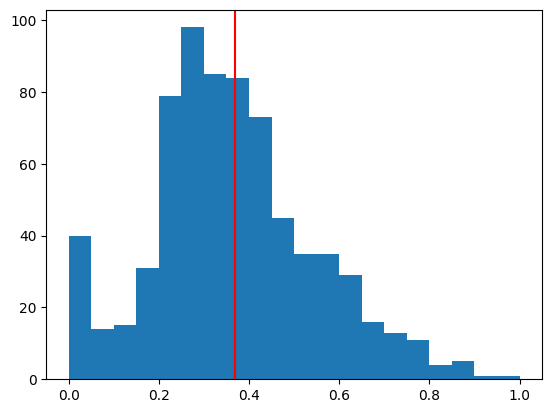

Średnia: 0.3679205534940792
Odchylenie standardowe: 0.1825395492879372


In [29]:
scaler_MinMax = MinMaxScaler()
normalized_age_values = scaler_MinMax.fit_transform(age_values.reshape(-1, 1))
plt.hist(normalized_age_values, bins=20)
plt.axvline(x = normalized_age_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {normalized_age_values.mean()}')
print(f'Odchylenie standardowe: {np.std(normalized_age_values, ddof=1)}')

In [30]:
#KORELACJA

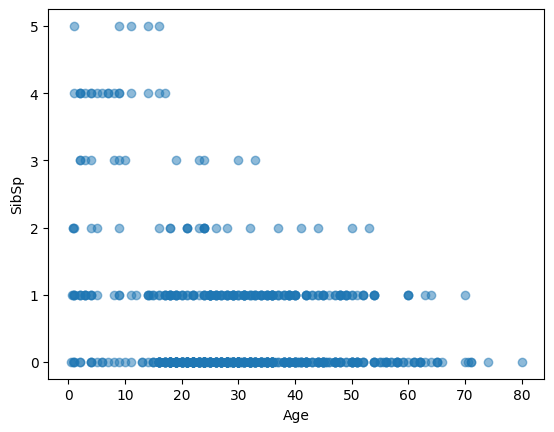

In [31]:
sibsb_values = dataset.loc[dataset['Age'].notnull(), 'SibSp'].values
plt.scatter(x=age_values, y=sibsb_values, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('SibSp')
plt.show()

In [32]:
stats.pearsonr(age_values, sibsb_values)

PearsonRResult(statistic=-0.3082467589236564, pvalue=3.5090251937831574e-17)

In [56]:
#PRAWDOPODOBIENSTWO

In [33]:
#Rozkład normalny

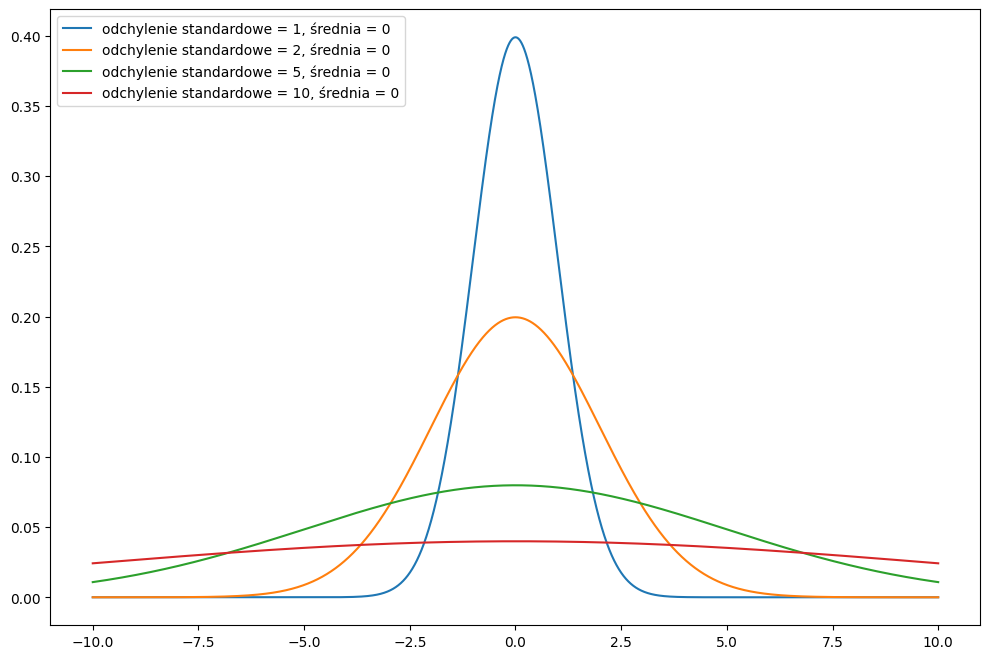

In [34]:
def gauss(x, sigma=1, mu=0):
    return stats.norm.pdf(x, mu, sigma)
x = np.linspace(-10, 10, 10000)
plt.figure(figsize=(12, 8))
plt.plot(x, gauss(x, sigma=1), label='odchylenie standardowe = 1, średnia = 0')
plt.plot(x, gauss(x, sigma=2), label='odchylenie standardowe = 2, średnia = 0')
plt.plot(x, gauss(x, sigma=5), label='odchylenie standardowe = 5, średnia = 0')
plt.plot(x, gauss(x, sigma=10), label='odchylenie standardowe = 10, średnia = 0')
plt.legend(loc='upper left')
plt.show()